## 1. Import the necessary libraries 


In [2]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as stats
from sklearn import preprocessing
from statsmodels.stats.proportion import proportions_ztest


## 2.Read the data as a data frame

In [4]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Perform basic EDA which should include the following and print out your insights at every step

### a. Shape of the data

In [3]:
data.shape

(1338, 7)

### b. Data type of each attribute

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### c. Checking the presence of missing value

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing values in the give Data

### d. 5 point summary of numerical attributes

In [6]:
data.describe().transpose() #for finding the 5 point summary of numerical attributes(Min,1st Quartile,Median,3rd Quartile,Maximum)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

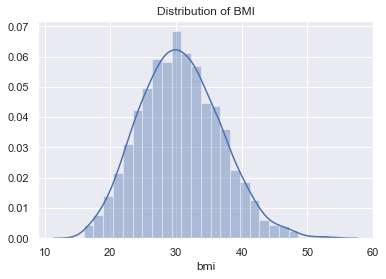

In [7]:
sns.distplot(data.bmi)
plt.title('Distribution of BMI')
plt.show()

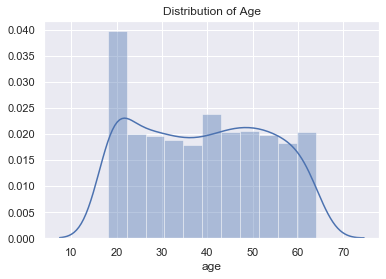

In [8]:
sns.distplot(data.age)
plt.title('Distribution of Age')
plt.show()

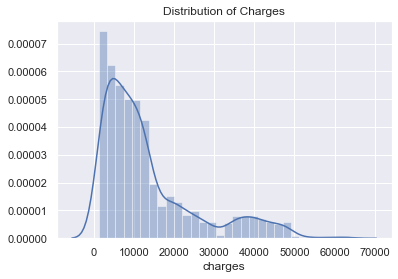

In [9]:
sns.distplot(data.charges)
plt.title('Distribution of Charges')
plt.show()

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
print('Skewness of BMI : ',stats. skew(data.bmi, axis=0, bias=True))
print('Skewness of Age : ',stats. skew(data.age, axis=0, bias=True))
print('Skewness of Charges : ',stats. skew(data.charges, axis=0, bias=True))

Skewness of BMI :  0.28372857291709386
Skewness of Age :  0.055610083072599126
Skewness of Charges :  1.5141797118745743


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

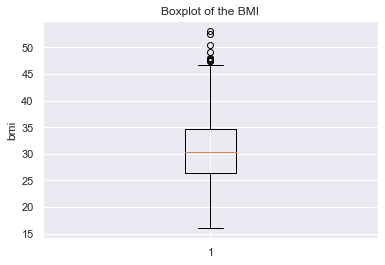

In [11]:
plot = plt.boxplot(data.bmi)
plt.title('Boxplot of the BMI')
plt.ylabel("bmi")

plt.show()

- There are significant outliers in the data

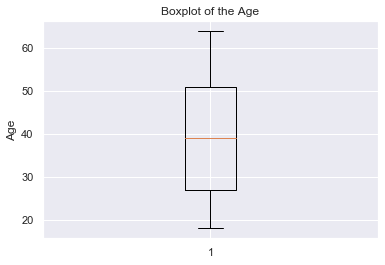

In [12]:
plot = plt.boxplot(data.age)
plt.title('Boxplot of the Age')
plt.ylabel("Age")

plt.show()

- There are no significant outliers in the data

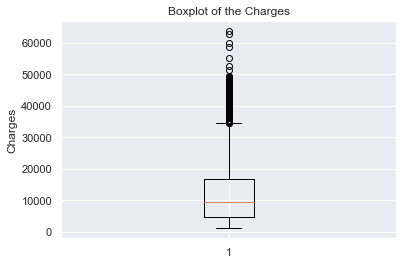

In [13]:
plot = plt.boxplot(data.charges)
plt.title('Boxplot of the Charges')
plt.ylabel("Charges")

plt.show()

- There are significant outliers in the data

### h. Distribution of categorical columns

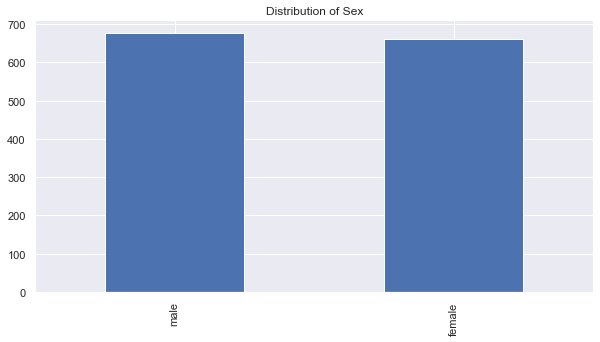

In [14]:
data['sex'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Distribution of Sex');


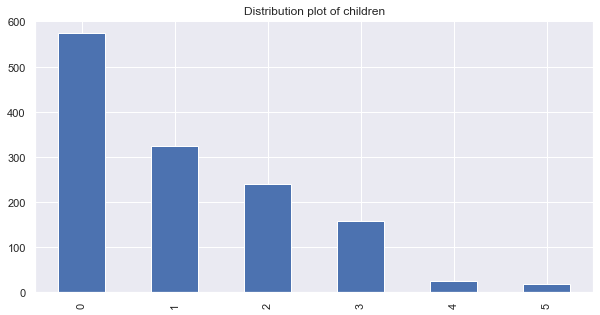

In [15]:
data['children'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Distribution plot of children');

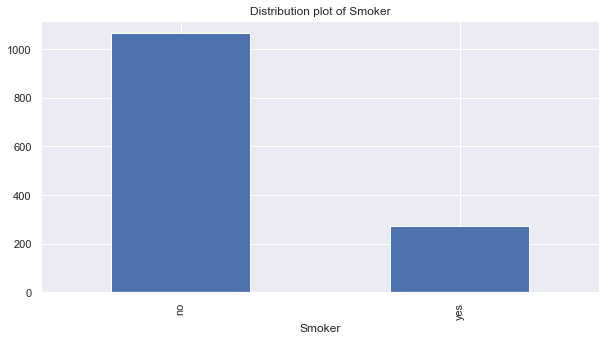

In [16]:
data['smoker'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Distribution plot of Smoker')
plt.xlabel('Smoker');

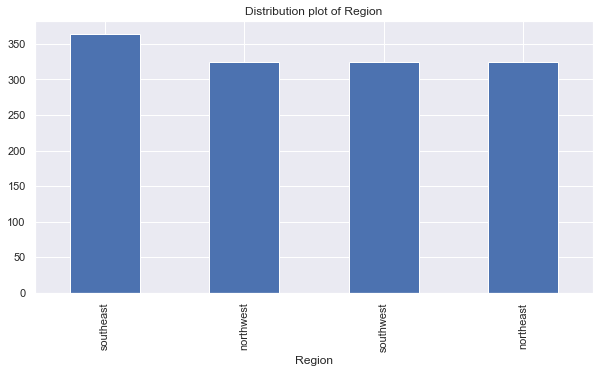

In [17]:
data['region'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Distribution plot of Region')
plt.xlabel('Region');

### i. Pair plot that includes all the columns of the data frame

In [8]:
data1=data.copy()
label_encoder=preprocessing.LabelEncoder()
data1['sex']=label_encoder.fit_transform(data1['sex'])
data1['smoker']=label_encoder.fit_transform(data1['smoker'])
data1['region']=label_encoder.fit_transform(data1['region']) #converting categorical columns to numerical for doing pair plot


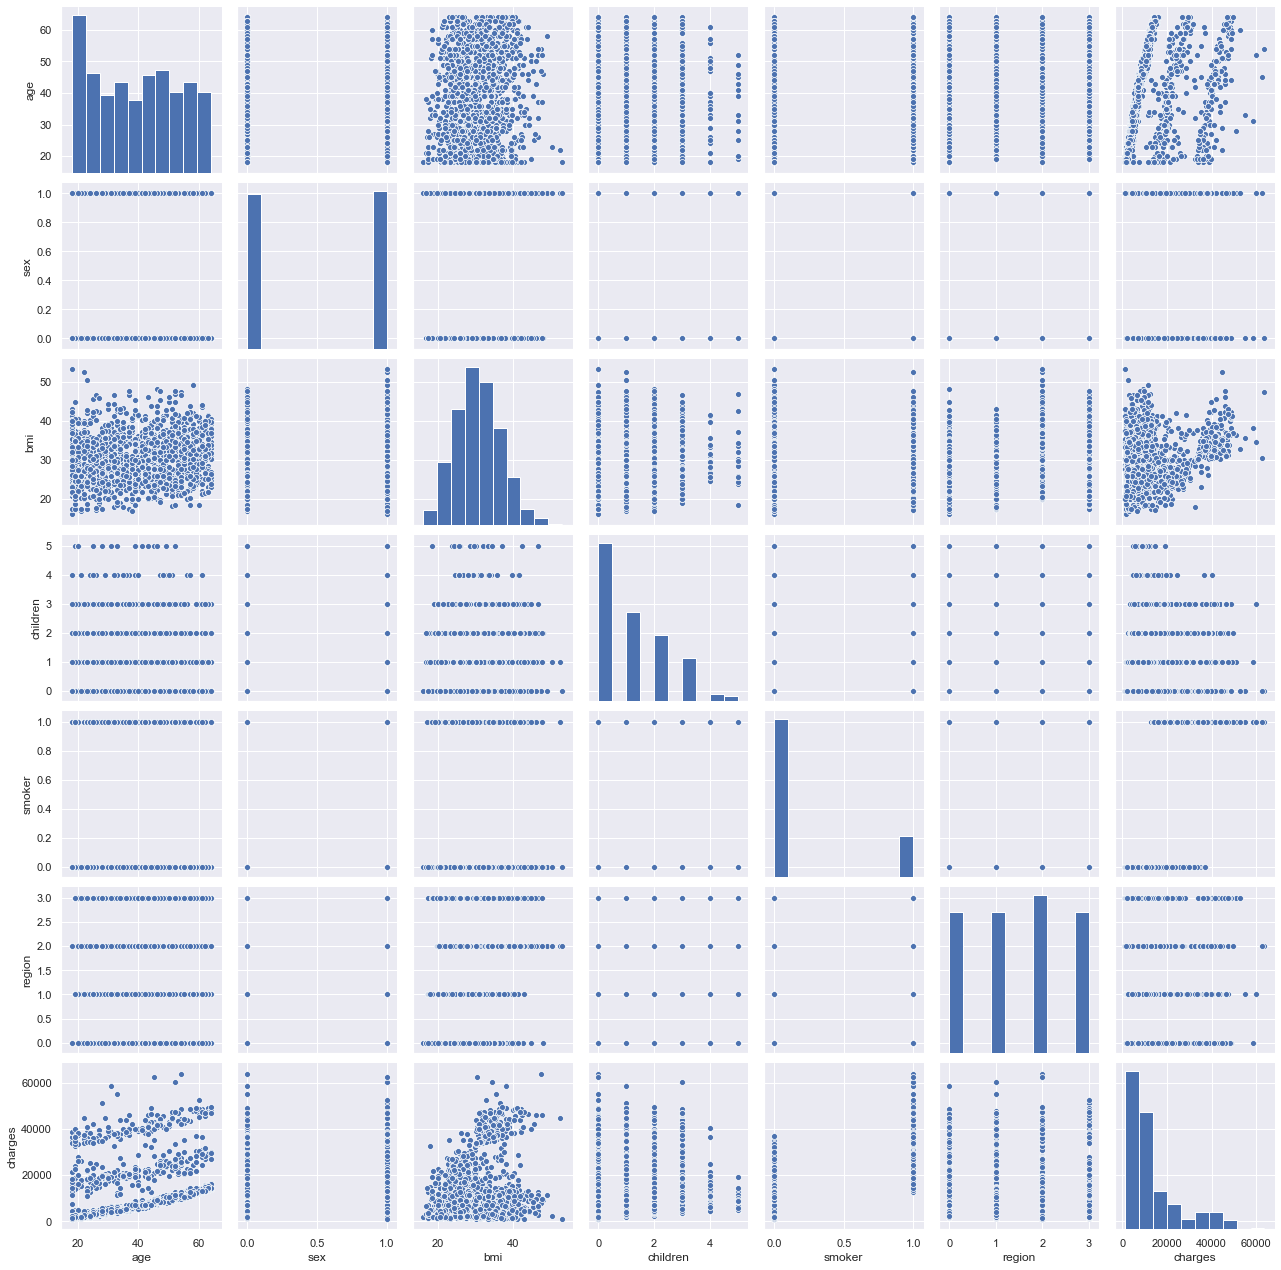

In [9]:
sns.pairplot(data1[['age', 'sex', 'bmi','children','smoker','region','charges']]); 

## 4. Answer the following questions with statistical evidence 


### a. Do charges of people who smoke differ significantly from the people who don't? 

Let us take a sample of Males and Females from the given table whoes age is '19'

In [11]:
age_19 = data[data['age'] ==19]
age_19.smoker.value_counts()

no     50
yes    18
Name: smoker, dtype: int64

In [21]:
sample_nonsmoker = age_19[age_19['smoker'] == 'no'].charges.iloc[:-32]   #excluding the last thrirty two elements to match the size 2 samples
sample_smoker = age_19[age_19['smoker'] == 'yes'].charges

In [22]:
v1, v2 = np.var(sample_nonsmoker) , np.var(sample_smoker)
print(v1,v2)

579506.7436445024 88641672.4309857


#### Defining null and alternative hypotheses

* $H_0$: v1 = v2 (Variation in charges of smokers and non smokers is equal same)
* $H_A$: v1 $\neq$ v2 (Variation in charges of smokers and non smokers is different)

In [23]:
n = 18  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 27.59    # critical chi_squared statistic. From the table 

In [24]:
chi = (dof*v1)/v2

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

Since the test statistic is less than the critical value, we fail to reject the null


Since we fail to reject the null,charges of people who smoke donot differ significantly from the people who don't

### b. Does bmi of males differ significantly from that of females?

Let us take a sample of Males and Females from the given table whoes age is '18'

In [21]:
age_18 = data[data['age'] == 18]
age_18.sex.value_counts()

male      36
female    33
Name: sex, dtype: int64

In [22]:
sample_male = age_18[age_18['sex'] == 'male'].bmi.iloc[:-3]   #excluding the last three elements to match the size 2 samples
sample_female = age_18[age_18['sex'] == 'female'].bmi

let v1,v2 be the variance of females and males respectively


In [23]:
v1, v2 = np.var(sample_female) , np.var(sample_male)
print(v1,v2)

33.522264325068875 44.446157483930214


#### Defining null and alternative hypotheses

* $H_0$: v1 = v2 (Variation in bmi of men and women is equal same)
* $H_A$: v1 $\neq$ v2 (Variation in bmi of men and women is different)

In [24]:
n = 33  # number of samples
dof = n - 1  # degrees of freedom
alpha = 0.05  # significance level
chi_critical = 46.19    # critical chi_squared statistic. From the table 

In [25]:
chi = (dof*v1)/v2

if chi < chi_critical:
    print("Since the test statistic is less than the critical value, we fail to reject the null")
else:
    print("Since the test statistic is more than the critical value, we reject the null")

Since the test statistic is less than the critical value, we fail to reject the null


Since we fail to reject the null,bmi of males donot differ significantly from that of females

c. Is the proportion of smokers significantly different in different
genders? 

* 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers significantly different in different genders? 

#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

In [26]:
female_smokers = data[data.sex == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = data[data.sex == 'male'].smoker.value_counts()[1] # number of male smokers
no_of_females = data.sex.value_counts()[1] # number of females in the data
no_of_males = data.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [no_of_females,no_of_males])

[115, 159] [662, 676]


In [27]:
print(f' Proportion of smokers in Females, Males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

 Proportion of smokers in Females, Males = 0.17%, 0.24% respectively


In [28]:
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [no_of_females,no_of_males])

if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant ie We reject the null hypothesis')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. ie We fail to reject the nullhypothesis')

With a p-value of 0.0053 the difference is significant ie We reject the null hypothesis


### d. Is the distribution of bmi across women with no children, one childand two children, the same? 

In [26]:
females_data = data[data['sex'] == 'female'] #copying the data of womens to a seperate dataframe

In [65]:
females_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [66]:
ch0=females_data[females_data['children']==0].bmi #bmi of womens with no children
ch1=females_data[females_data['children']==1].bmi #bmi of womens with one children
ch2=females_data[females_data['children']==2].bmi #bmi of womens with two children

In [54]:
print('Count, Mean and standard deviation of  bmi across women with no children: %3d, %3.2f and %3.2f' % (len(ch0 ), ch0.mean(),np.std(ch0 ,ddof =1)))
print('Count, Mean and standard deviation of  bmi across women with one children: %3d, %3.2f and %3.2f' % (len(ch1), ch1.mean(),np.std(ch1,ddof =1)))
print('Count, Mean and standard deviation of  bmi across women with two children: %3d, %3.2f and %3.2f' % (len(ch2), ch2.mean(),np.std(ch2,ddof =1)))

Count, Mean and standard deviation of  bmi across women with no children: 289, 30.36 and 5.97
Count, Mean and standard deviation of  bmi across women with one children: 158, 30.05 and 5.79
Count, Mean and standard deviation of  bmi across women with two children: 119, 30.65 and 6.63


In [58]:
female_bmi = pd.DataFrame()

df0=pd.DataFrame({'Children': '0', 'bmi':ch0})
df1=pd.DataFrame({'Children': '1', 'bmi':ch1})
df2=pd.DataFrame({'Children': '2', 'bmi':ch2})

female_bmi=female_bmi.append(df0)
female_bmi=female_bmi.append(df1)
female_bmi=female_bmi.append(df2)
female_bmi



,Children,bmi
0,0,27.900
5,0,25.740
9,0,25.840
11,0,26.290
13,0,39.820
...,...,...
1313,2,34.700
1319,2,26.315
1323,2,40.370
1328,2,24.225


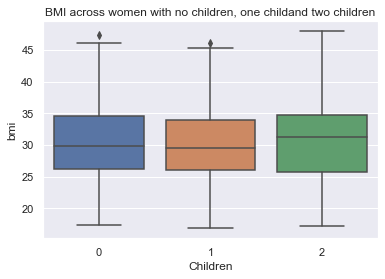

In [60]:
sns.boxplot(x = "Children", y = "bmi", data = female_bmi)
plt.title('BMI across women with no children, one childand two children')
plt.show()

#### Defining null and alternate Hypothesis

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean BMI across women with no children, one child and two children respectively.

#### Deciding the Significance Level

Here we select α = 0.05

#### Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

#### Calculate p value using ANOVA table
* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [63]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ Children', data = female_bmi).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
Children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


#### Decide to reject or accept null hypothesis

Here, p value is 0.715858 and it is greater than our chosen level of signifance at 5%

So the statistical decision is not to reject the null hypothesis.

### So bmi across women with no children, one child and two children, are same